In [1]:
import numpy as np
import os
import spacy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from spacy.vocab import Vocab
import gensim
import pandas as pd
import seaborn as sns



## Preprocessing

In [4]:
# Open the vector file and parse each line
VECTOR_DIRECTORY = "GloVe"
VECTOR_FILE = "vectors_28_rappers.txt"
# VECTOR_1990_FILE_SMALL = "vectors_rappers_big_1990.txt"
# VECTOR_2000_FILE_SMALL = "vectors_rappers_big_2000.txt"
# VECTOR_2010_FILE_SMALL = "vectors_rappers_big_2010.txt"
VECTOR_1990_FILE_SMALL = "vectors_nyt_lemm_1990.txt"
VECTOR_2000_FILE_SMALL = "vectors_nyt_lemm_2000.txt"
VECTOR_2010_FILE_SMALL = "vectors_nyt_lemm_2010.txt"
NB_DIM = 50

for file in [VECTOR_FILE,VECTOR_1990_FILE_SMALL, VECTOR_2000_FILE_SMALL, VECTOR_2010_FILE_SMALL]:
    # Add the header to the docuement 
    with open(os.path.join(VECTOR_DIRECTORY,file), "r", encoding="utf-8") as f:
        contents = f.readlines()
        nb_words = len(contents)  
    with open(os.path.join(VECTOR_DIRECTORY,file), "w", encoding="utf-8") as f:
        f.write(f"{nb_words} {NB_DIM}\n")
        # Write the rest of the file, starting at the second line
        for line in contents:
            f.write(line)

## Glove training

## Creating Vector Spaces

In [76]:


# print(os.path.join(VECTOR_DIRECTORY,VECTOR_FILE))
# word_vectors = {}
# with open(os.path.join(VECTOR_DIRECTORY,VECTOR_FILE), "r") as f:
#     for line in f:
#         # Split the line into the word and the coordinates
#         parts = line.strip().split()
#         word = parts[0]
#         vector = [float(x) for x in parts[1:]]
#         # Store the vector in the dictionary
#         word_vectors[word] = vector

In [77]:
# len(word_vectors)

In [5]:

## General space vector
# Load pre-trained word vectors from a file
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(os.path.join(VECTOR_DIRECTORY,VECTOR_FILE))
custom_vocab = [ word for word in word2vec_model.key_to_index]


word_vectors = {}
for word in word2vec_model.key_to_index:
    word_vectors[word] = word2vec_model.get_vector(word)
    
# Create a blank 'en' model
custom_nlp = spacy.blank('en')
vocab = Vocab(strings=custom_vocab)

custom_nlp.vocab = vocab
custom_nlp.vocab.vectors = spacy.vocab.Vectors(data=np.array([x for x in word_vectors.values()]), keys=word_vectors.keys())

## 1990 space vector

# word2vec_1990_model = gensim.models.KeyedVectors.load_word2vec_format(os.path.join(VECTOR_DIRECTORY,VECTOR_1990_FILE_SMALL))
# custom_1990_vocab = [ word for word in word2vec_model.key_to_index]
# word_1990_vectors = {}
# for word in word2vec_1990_model.key_to_index:
#     word_1990_vectors[word] = word2vec_1990_model.get_vector(word)

# # Create a blank 'en' model
# custom_1990_nlp = spacy.blank('en')
# vocab_1990 = Vocab(strings=custom_1990_vocab)

# custom_1990_nlp.vocab = vocab_1990
# custom_1990_nlp.vocab.vectors = spacy.vocab.Vectors(data=np.array([x for x in word_1990_vectors.values()]), keys=word_1990_vectors.keys())

word2vec_1990_model = gensim.models.KeyedVectors.load_word2vec_format(os.path.join(VECTOR_DIRECTORY,VECTOR_1990_FILE_SMALL))
custom_1990_vocab = [ word for word in word2vec_1990_model.key_to_index]
word_1990_vectors = {}
for word in word2vec_1990_model.key_to_index:
    word_1990_vectors[word] = word2vec_1990_model.get_vector(word)


# Create a blank 'en' model
custom_1990_nlp = spacy.blank('en')
vocab_1990 = Vocab(strings=custom_1990_vocab)

custom_1990_nlp.vocab = vocab_1990
custom_1990_nlp.vocab.vectors = spacy.vocab.Vectors(data=np.array([x for x in word_1990_vectors.values()]), keys=word_1990_vectors.keys())



## 2000 space vector

word2vec_2000_model = gensim.models.KeyedVectors.load_word2vec_format(os.path.join(VECTOR_DIRECTORY,VECTOR_2000_FILE_SMALL))
custom_2000_vocab = [ word for word in word2vec_2000_model.key_to_index]
word_2000_vectors = {}
for word in word2vec_2000_model.key_to_index:
    word_2000_vectors[word] = word2vec_2000_model.get_vector(word)


# Create a blank 'en' model
custom_2000_nlp = spacy.blank('en')
vocab_2000 = Vocab(strings=custom_2000_vocab)

custom_2000_nlp.vocab = vocab_2000
custom_2000_nlp.vocab.vectors = spacy.vocab.Vectors(data=np.array([x for x in word_2000_vectors.values()]), keys=word_2000_vectors.keys())

## 2010 space vector

word2vec_2010_model = gensim.models.KeyedVectors.load_word2vec_format(os.path.join(VECTOR_DIRECTORY,VECTOR_2010_FILE_SMALL))
custom_2010_vocab = [word for word in word2vec_2010_model.key_to_index]
word_2010_vectors = {}
for word in word2vec_2010_model.key_to_index:
    word_2010_vectors[word] = word2vec_2010_model.get_vector(word)

custom_2010_nlp = spacy.blank('en')
vocab_2010 = Vocab(strings=custom_2010_vocab)

custom_2010_nlp.vocab = vocab_2010
custom_2010_nlp.vocab.vectors = spacy.vocab.Vectors(data=np.array([x for x in word_2010_vectors.values()]), keys=word_2010_vectors.keys())


In [6]:
custom_1990_nlp.vocab['women'].vector

array([-0.712811, -0.140515, -0.081661,  0.396104, -0.091681,  0.423857,
        0.81266 ,  0.68768 ,  0.809664, -0.618594,  0.973625,  0.445852,
        0.370933, -0.431238, -1.549036, -1.258613,  0.694409, -0.205649,
        0.143962, -1.546777,  0.282567,  0.847189,  0.581555,  0.147283,
       -0.549805, -0.558739, -0.087303, -0.961443,  0.098608,  0.79471 ,
       -0.445081, -0.378597,  0.702106,  1.185524, -0.101263, -1.157129,
        0.268728, -0.576952,  1.158778,  0.239885, -1.015502,  0.498279,
        1.43314 , -0.150734, -0.405948,  0.661739, -0.747595,  0.245968,
       -0.10046 ,  0.430676], dtype=float32)

In [7]:
def most_similar(nlp,x, n=10):
    """Returns the n most similar words to the given vector x"""
    list = nlp.vocab.vectors.most_similar(x.reshape(1, -1), n=n)
    list = [nlp.vocab[i] for i in list[0][0]]
    return list

In [8]:
print(' '.join(w.text for w in most_similar(custom_2000_nlp,custom_2000_nlp.vocab['women'].vector,100)))

women men young basketball national children black lives people woman college finds sex team studies jewish community voters residents including organization campaign elderly latina risk students rights brandeis history years teams longer nude attention university center association american disabilities man taken day giving lead health look having quake research board football taking especially education outnumber photos states study patients america left world care older committee behalf educate rutgers political holds doctors improve early photo m recent media hospital local need hollinger researchers americans win s experience rubicam policy council girls serve african pregnant blythedale disease says life female conscious success


In [82]:
print(' '.join(w.text for w in most_similar(custom_2010_nlp,custom_2010_nlp.vocab['money'].vector,100)))

money numb spend digits pain push milf stack gettin ask time niggas mind bitches gifted shit power talking bout tall races getting racks cause got nigga need coming gon young cash count love ai fuck digger lyrics throw baby bag countin dip wanna fast line play like lettin man huh know throwin shake yeah bank awake checks diamonds right palm hoes family let trust want fame blow stash sunday season stand bands talkin dance high way reason dancer milk bitch ta jumpin talk pocket club world half monday feet trees come counting stay little envy big dropped everybody check fly


In [83]:
from  sklearn.manifold import TSNE
import matplotlib.pyplot as plt
colors = [
    'red', 'green', 'blue', 'yellow', 'purple', 'orange', 'black', 'lime', 'pink'
]

n_sample = 10

def plot_most_similar(vocabulary):
    most_similar = []
    for word in vocabulary:
        query = np.asarray([word.vector])
        most_similar.append(nlp.vocab.vectors.most_similar(query, n=n_sample))

    vectors = []
    labels = []
    for similars in most_similar:
        for key in similars[0][0]:
            vectors.append(nlp.vocab[key].vector)
            labels.append(nlp.vocab.strings[key])

    reduced_vectors = TSNE(n_components=2, perplexity=2).fit_transform(np.asanyarray(vectors))
  
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    index_label = 0
    for vector in reduced_vectors:
        ax.scatter(vector[0], vector[1], c=colors[int(index_label / n_sample)])
        ax.annotate(labels[index_label], (vector[0], vector[1]))
        index_label += 1

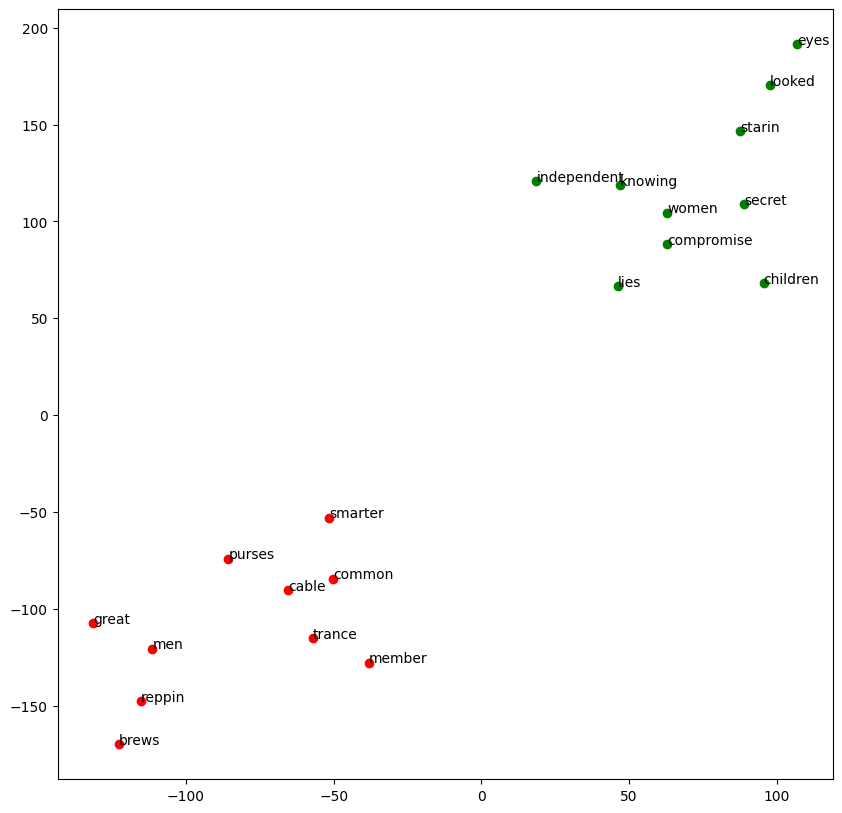

In [84]:
plot_most_similar(nlp.vocab[w] for w in ['men', 'women'])

## Analysis

In [15]:

anaylysis_nlp = spacy.load('en_core_web_md')

In [9]:
## Getting the centroid vector of a list of words
def get_centroid_vector(nlp, words):
    # Compute the mean of the vectors of the tokens
    vector = np.mean([nlp.vocab[word].vector for word in words], axis=0)
    vector = most_similar(nlp,vector,1)[0]
    return vector

In [10]:
def get_the_gender(gender_vectors, concept_vector):
    # Compute the cosine similarity between the concept
    # print(gender_vectors[0].similarity(concept_vector))
    # print(concept_vector.vector)
    if gender_vectors[0].similarity(concept_vector) >  gender_vectors[1].similarity(concept_vector):
        return "Female"
    else:
        return "Male"

In [11]:
def get_the_similarity(gender_vectors, concept_vector):
    return gender_vectors[0].similarity(concept_vector) ,  gender_vectors[1].similarity(concept_vector)

### General

In [14]:
custom_nlp.vocab['power'].vector

array([-0.465795,  0.211679,  0.469522,  0.590993,  0.034188,  0.270072,
        0.519595,  0.449081,  0.462998,  0.057653, -0.324602,  0.275774,
        0.790755, -0.092275, -0.209907, -0.194806, -0.123909, -0.181743,
       -0.336498,  0.313324, -0.912776,  0.264077,  0.056343, -0.149799,
       -0.007565,  0.355341,  0.409538, -0.190968, -0.675465, -0.103554,
       -0.011035,  0.537779,  0.323223,  0.063154,  0.006478,  0.089981,
       -0.216941, -0.589293, -0.542214, -0.133556, -0.204511,  0.19978 ,
       -0.392468,  0.194904,  0.352912,  0.087991, -0.037734,  0.571515,
       -0.132913,  0.005455], dtype=float32)

In [90]:
women_centroid_vector = get_centroid_vector(custom_nlp, ['women', 'girl', 'lady'])
men_centroid_vector = get_centroid_vector(custom_nlp, ['men','boy','guy'])
women_related_words = ' '.join(w.text for w in most_similar(women_centroid_vector.vector,100))
men_related_words = ' '.join(w.text for w in most_similar(men_centroid_vector.vector,100))

AttributeError: 'numpy.ndarray' object has no attribute 'vocab'

#### The POS tag of words that are the closest

In [ ]:
women_pos = {}
for word in women_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ not in women_pos.keys():
            women_pos[token.pos_] =1
        else:
            women_pos[token.pos_] +=1
sorted(women_pos.items(), key=lambda x: x[1], reverse=True)
     

[('VERB', 37),
 ('NOUN', 30),
 ('PROPN', 11),
 ('ADJ', 10),
 ('INTJ', 5),
 ('ADV', 3),
 ('PUNCT', 1),
 ('ADP', 1),
 ('SCONJ', 1),
 ('AUX', 1)]

In [ ]:
men_pos = {}
for word in men_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ not in men_pos.keys():
            men_pos[token.pos_] =1
        else:
            men_pos[token.pos_] +=1
sorted(men_pos.items(), key=lambda x: x[1], reverse=True)

[('VERB', 31),
 ('NOUN', 31),
 ('ADJ', 16),
 ('PROPN', 10),
 ('INTJ', 5),
 ('ADV', 5),
 ('X', 2)]

#### Closest adjectives

In [ ]:
for word in women_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ == 'ADJ':
            print(token.text)

nice
easy
good
crooked
fine
fat
plenty
hypnotic
big
white


In [ ]:
for word in men_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ == 'ADJ':
            print(token.text)

bad
lame
crazy
nice
little
thick
cool
good
fat
loud
okay
young
big
funny
hort
black


#### Closest Noun

In [ ]:
for word in women_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ == 'NOUN':
            print(token.text)

girl
fans
jerk
body
lambo
woman
way
baby
style
morn
goal
seat
word
love
bands
business
wine
face
tactics
jeans
text
mom
lyrics
jus
lights
emotion
changes
hair
party
dough


In [ ]:
for word in men_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ == 'NOUN':
            print(token.text)

face
folks
job
hell
motherfuckers
drug
love
streets
style
word
honey
girl
game
daddy
things
money
chicks
work
boys
east
shakin
moon
guy
mother
bitches
feelin
sight
day
place
bus
lights


#### Closest verb

In [ ]:
for word in women_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ == 'VERB':
            print(token.text)

relax
settle
telling
lay
found
relate
gave
need
catch
turn
want
smile
suck
loving
act
find
tell
reach
forget
leave
ask
hold
meet
riding
worried
went
let
cause
fight
ran
know
aww
shook
hear
help
break
listen


In [ ]:
for word in men_related_words.split(' '):
    doc = anaylysis_nlp(word)
    for token in doc:
        if token.pos_ == 'VERB':
            print(token.text)

boo
act
know
caught
think
lost
looking
diss
fuck
asked
hate
mean
fact
heard
hope
gave
fed
met
ai
ear
believe
forget
stop
found
ran
thought
need
grown
cut
bling
fucked


#### Plot the similarity between gender on concepts

In [ ]:
gender_vectors = [women_centroid_vector,men_centroid_vector]

In [ ]:
concepts = ['power','money','fame','work','fear', 'love', 'hate', 'anger', 'joy', 'sadness', 'trust', 'disgust', 'surprise', 'anticipation', 'hope', 'relief', 'envy', 'guilt', 'shame', 'pride', 'optimism', 'pessimism', 'faith', 'despair', 'courage', 'bravery', 'kindness', 'compassion', 'honesty', 'loyalty', 'justice', 'fairness', 'truth', 'beauty', 'ugliness', 'intelligence', 'stupidity', 'wisdom', 'foolishness', 'strength', 'weakness', 'health', 'illness', 'life', 'death', 'peace', 'war', 'freedom']
concept_genders = {}
for concept in concepts:
    concept_genders[concept] = get_the_similarity(gender_vectors, custom_nlp.vocab[concept])


C:\Users\Owein\AppData\Local\Temp\ipykernel_9272\3806629756.py:2: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  return gender_vectors[0].similarity(concept_vector) ,  gender_vectors[1].similarity(concept_vector)


In [ ]:
import pandas as pd
values = list(concept_genders.values())
df = pd.DataFrame({'concept': list(concept_genders.keys()), 'women': [x for x, y in values], 'men': [y for x, y in values]})


,concept,women,men
0,power,-0.004742,-0.128928
1,money,0.157959,0.293631
2,fame,0.539748,0.221141
3,shine,-0.307635,-0.253759
4,work,0.139027,0.279030
5,fear,-0.199994,-0.396996
6,love,0.435408,0.345494
7,hate,0.047675,0.354393
11,trust,-0.212231,0.025974
15,hope,0.097301,0.319485


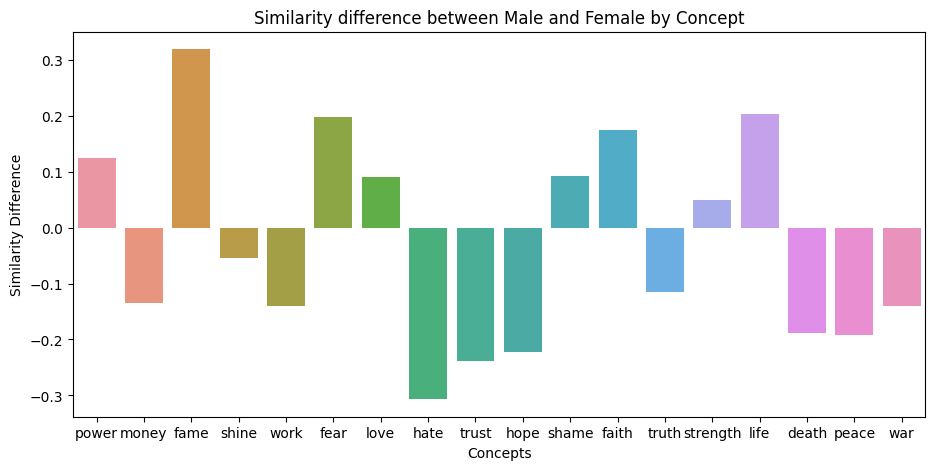

In [ ]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(11,5))

# Compute the difference in similarity between men and women
df['difference'] = df['women'] - df['men']

# Create the bar plot
sns.barplot(x='concept', y='difference', data=df[df['men']!=0])

# Add labels and title
plt.xlabel('Concepts')
plt.ylabel('Similarity Difference')
plt.title('Similarity difference between Male and Female by Concept')

# Show the plot
plt.show()


In [ ]:
df

,concept,women,men,difference
0,power,-0.004742,-0.128928,0.124186
1,money,0.157959,0.293631,-0.135673
2,fame,0.539748,0.221141,0.318607
3,shine,-0.307635,-0.253759,-0.053876
4,work,0.139027,0.279030,-0.140003
5,fear,-0.199994,-0.396996,0.197003
6,love,0.435408,0.345494,0.089914
7,hate,0.047675,0.354393,-0.306718
8,anger,0.000000,0.000000,0.000000
9,joy,0.000000,0.000000,0.000000


### By Decade

In [12]:
nlps = {"1990":custom_1990_nlp,"2000":custom_2000_nlp,"2010":custom_2010_nlp}

women_centroid_vectors = {}

for year,nlp in nlps.items():
    women_centroid_vectors[year] = get_centroid_vector(nlp,['women', 'girl'])
 
men_centroid_vectors = {}
for year,nlp in nlps.items():
 men_centroid_vectors[year] = get_centroid_vector(nlp, ['men','boy'])

women_related_words = {}
for year,nlp in nlps.items():
    women_related_words[year] = ' '.join(w.text for w in most_similar(nlp,women_centroid_vectors[year].vector,100))
    
men_related_words = {}
for year,nlp in nlps.items():
    men_related_words[year] = ' '.join(w.text for w in most_similar(nlp,men_centroid_vectors[year].vector,100))



#### POS TAG that are the closest

In [16]:

year_women_pos = {}
for year,words in women_related_words.items():
    women_pos = {}
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ not in women_pos.keys():
                women_pos[token.pos_] =1
            else:
                women_pos[token.pos_] +=1
    year_women_pos[year] = sorted(women_pos.items(), key=lambda x: x[1], reverse=True)
    
year_men_pos = {}
for year,words in men_related_words.items():
    men_pos = {}
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ not in men_pos.keys():
                men_pos[token.pos_] =1
            else:
                men_pos[token.pos_] +=1
    year_men_pos[year] = sorted(men_pos.items(), key=lambda x: x[1], reverse=True)
    

In [17]:
custom_palette = ["#66c2a5", "#fc8d62", "#8da0cb"]
sns.set_palette(custom_palette)

C:\Users\Owein\AppData\Local\Temp\ipykernel_22068\1243610563.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='word', y='count', hue='year', data=df[df['gender'] == 'men' ].query("count >= 2"), ci=None, estimator=sum, hue_order=year_women_pos.keys(), ax=ax1)
C:\Users\Owein\AppData\Local\Temp\ipykernel_22068\1243610563.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='word', y='count', hue='year', data=df[df['gender'] == 'women'].query("count >= 2"), ci=None, estimator=sum, hue_order=year_women_pos.keys(), ax=ax2)


<Figure size 1200x500 with 0 Axes>

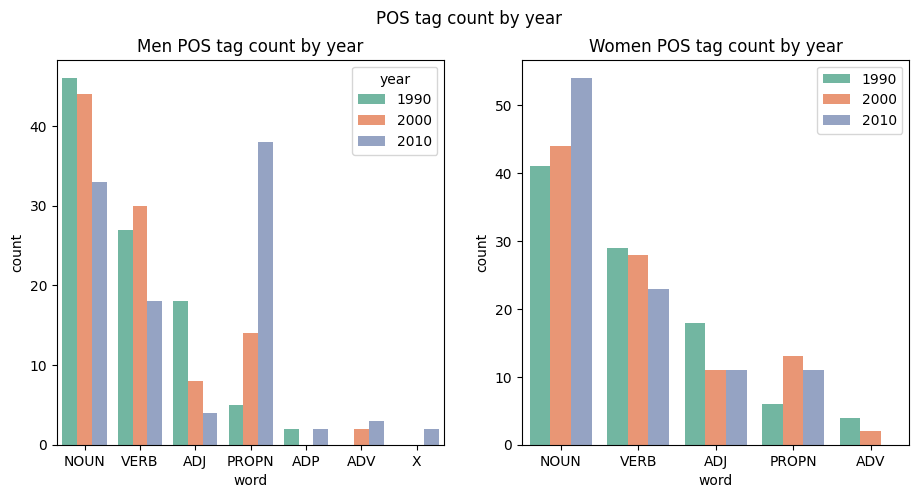

In [18]:

plt.figure(figsize=(12,5))
df_list_women = []
df_list_men = []
for year, pos_list in year_women_pos.items():
    df = pd.DataFrame(pos_list, columns=["word", "count"])
    df['year'] = year
    df['gender'] = 'women'
    df_list_women.append(df)
    
for year, pos_list in year_men_pos.items():
    df = pd.DataFrame(pos_list, columns=["word", "count"])
    df['year'] = year
    df['gender'] = 'men'
    df_list_men.append(df)

df = pd.concat(df_list_women+df_list_men, ignore_index=True)    

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))

# First plot (men)
sns.barplot(x='word', y='count', hue='year', data=df[df['gender'] == 'men' ].query("count >= 2"), ci=None, estimator=sum, hue_order=year_women_pos.keys(), ax=ax1)
ax1.set_title("Men POS tag count by year")

# Second plot (women)
sns.barplot(x='word', y='count', hue='year', data=df[df['gender'] == 'women'].query("count >= 2"), ci=None, estimator=sum, hue_order=year_women_pos.keys(), ax=ax2)
ax2.set_title("Women POS tag count by year")

plt.suptitle("POS tag count by year")
plt.legend(loc='upper right')
plt.show()


#### Positiveness analysis

In [19]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def word_score(adj_list):
    scores = [sia.polarity_scores(word)['compound'] for word in adj_list]
    return scores


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owein\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### Closest Adjectives positiveness

In [20]:

df_adj_women_list = []
df_adj_men_list = []
for year,words in women_related_words.items():
    adjectives = []
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ == 'ADJ':
                adjectives.append(token.text)
    df_adj_women_list.append(pd.DataFrame({'year':year,'gender':'women','adjectives':adjectives,'score':word_score(adjectives)}))
for year,words in men_related_words.items():
    adjectives = []
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ == 'ADJ':
                adjectives.append(token.text)
    df_adj_men_list.append(pd.DataFrame({'year':year,'gender':'men','adjectives':adjectives,'score':word_score(adjectives)}))
df = pd.concat(df_adj_women_list+df_adj_men_list, ignore_index=True) 

In [ ]:
df[df['gender']=="women"].query('score != 0')['score'].groupby(df['year']).mean()

year
1990    0.264229
2000    0.236167
2010    0.221200
Name: score, dtype: float64

In [ ]:
df[df['gender']=="men"].query('score != 0')['score'].groupby(df['year']).mean()

year
1990    0.091233
2000   -0.164100
2010   -0.002925
Name: score, dtype: float64

Text(0.5, 1.0, 'Closest adjectives positiveness')

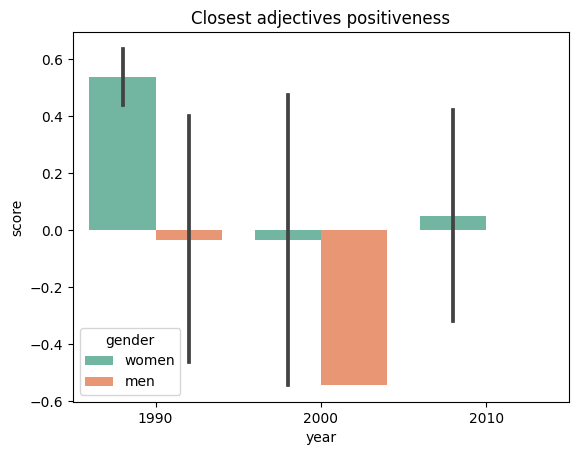

In [21]:
sns.barplot(x='year', y='score', hue='gender', data=df[df['score']!=0])
plt.title('Closest adjectives positiveness')

#### Closest Noun positiveness

In [22]:
df_noun_women_list = []
df_noun_men_list = []
for year,words in women_related_words.items():
    nouns = []
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ == 'NOUN':
                nouns.append(token.text)
    df_noun_women_list.append(pd.DataFrame({'year':year,'gender':'women','nouns':nouns,'score':word_score(nouns)}))
for year,words in men_related_words.items():
    nouns = []
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ == 'NOUN':
                nouns.append(token.text)
    df_noun_men_list.append(pd.DataFrame({'year':year,'gender':'men','nouns':nouns,'score':word_score(nouns)}))
df = pd.concat(df_noun_women_list+df_noun_men_list, ignore_index=True) 

Text(0.5, 1.0, 'Closest nouns positiveness')

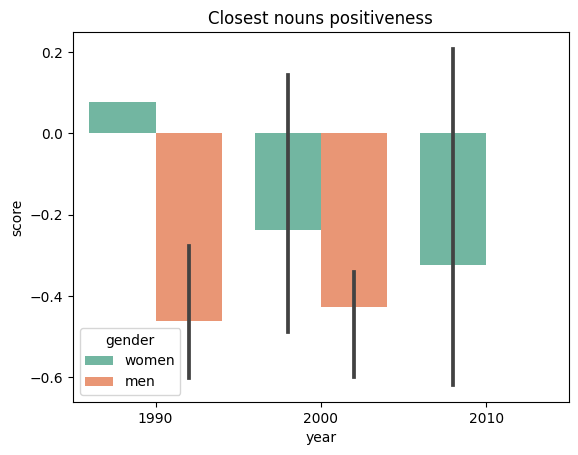

In [23]:
sns.barplot(x='year', y='score', hue='gender', data=df[df['score']!=0])
plt.title('Closest nouns positiveness')

#### Closest Verbs positiveness

In [24]:
df_verbs_women_list = []
df_verbs_men_list = []
for year,words in women_related_words.items():
    verbs = []
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ == 'VERB':
                verbs.append(token.text)
    df_verbs_women_list.append(pd.DataFrame({'year':year,'gender':'women','verbs':verbs,'score':word_score(verbs)}))
for year,words in men_related_words.items():
    verbs = []
    for word in words.split(' '):
        doc = anaylysis_nlp(word)
        for token in doc:
            if token.pos_ == 'VERB':
                verbs.append(token.text)
    df_verbs_men_list.append(pd.DataFrame({'year':year,'gender':'men','verbs':verbs,'score':word_score(verbs)}))
df = pd.concat(df_verbs_women_list+df_verbs_men_list, ignore_index=True) 

In [ ]:
df[df['gender']=="men"].query('score != 0')['score'].groupby(df['year']).mean()

year
1990    0.022460
2000   -0.015080
2010   -0.309967
Name: score, dtype: float64

Text(0.5, 1.0, 'Closest Verbs positiveness')

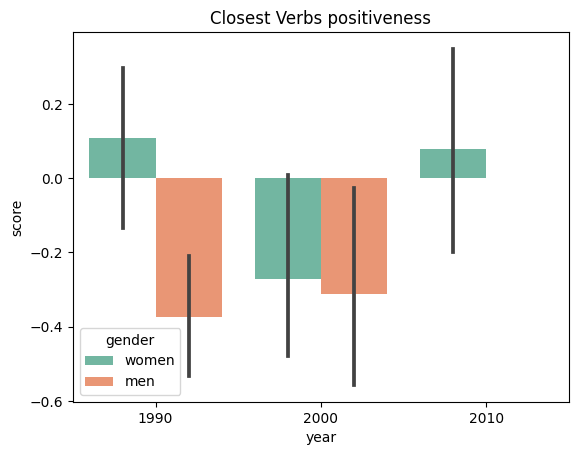

In [25]:
sns.barplot(x='year', y='score', hue='gender', data=df[df['score']!=0])
plt.title('Closest Verbs positiveness')

#### Plot the similarity between gender on concepts

In [26]:
gender_vectors = [women_centroid_vectors,men_centroid_vectors]

In [30]:
concepts = ['power','money','work','love','anger','pride','truth','beauty','intelligence','freedom','child']
concept_genders = {concept:{'1990':0,'2000':0,'2010':0} for concept in concepts}

for concept in concepts:
    for year in ['1990','2000','2010']:
        concept_genders[concept][year] = get_the_similarity([women_centroid_vectors[year],men_centroid_vectors[year]], nlps[year].vocab[concept]) 


In [31]:
values = list(concept_genders.values())
d_values = []
for concept in values:
    for  v in concept.values():
        d_values.append(v)
y_values = []
for concept in values:
    for  v in concept:
        y_values.append(v)
c_values = []
for key in concept_genders.keys():
    c_values.append(key)
    c_values.append(key)
    c_values.append(key)
df_list = []
df_list.append(pd.DataFrame({ 'concept':c_values, 'year':y_values, 'women': [x[0] for x in d_values], 'men': [x[1] for x in d_values]}))
        
df = pd.concat(df_list, ignore_index=True)


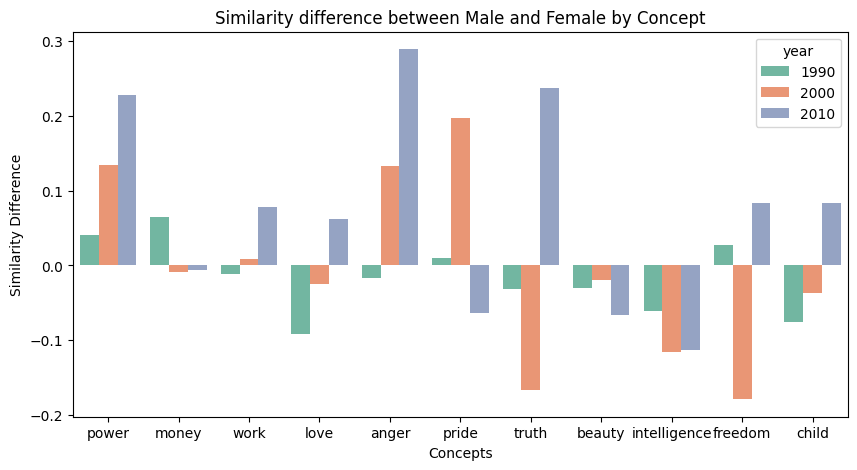

In [32]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,5))

# Compute the difference in similarity between men and women
df['difference'] = df['women'] - df['men']

# Create the bar plot
sns.barplot(x='concept', y='difference', data=df[df['men']!=0], hue='year', hue_order=['1990', '2000', '2010'])

# Add labels and title
plt.xlabel('Concepts')
plt.ylabel('Similarity Difference')
plt.title('Similarity difference between Male and Female by Concept')

# Show the plot
plt.show()